In [1]:
import pandas as pd
import os
from IGTD_Functions import min_max_transform, table_to_image, select_features_by_variation

In [2]:
data = pd.read_csv('D:\_workspace\IGTD_data\synthetic_easy.csv', low_memory=False, engine='c', header=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,1.734592,2.780491,1.417158,3.686662,5.118875,4.573830,-8.215202,-0.072489,-1.186340,1.237917,...,2.868276,-3.802698,5.242128,-0.799300,2.914359,-4.093973,1.085620,0.349552,-4.499424,3
1,-6.293556,-2.898422,1.326814,3.112081,-2.433431,2.508765,-2.969523,4.284682,-6.384020,2.333088,...,-0.841713,-4.352038,-4.164152,1.831736,1.631724,-3.501113,5.237922,-1.626949,6.090659,2
2,0.633210,-0.431715,-0.361484,-4.502835,-2.674306,-5.137693,-0.817107,-0.596912,-7.831042,1.459055,...,3.811912,1.646920,-1.193743,-4.880895,-1.038076,-0.697127,4.770455,-3.935205,5.579066,2
3,-1.364776,-2.185640,2.925041,3.806561,-2.787187,1.339454,5.045316,1.576899,3.052145,0.681585,...,2.820924,0.209048,-4.214489,-6.642819,3.013582,-4.224046,4.887361,-1.631506,4.201697,2
4,3.807698,4.635253,4.656461,2.848456,1.773305,-2.860682,-2.667094,3.652334,-2.281041,1.432178,...,-1.967735,-6.682935,1.218953,4.399610,4.228946,2.857592,2.652872,1.351070,2.417561,1


In [3]:
# detach label column
label = data['label']
data = data.drop(['label'], axis=1)

In [4]:
num_row = 5    # Number of pixel rows in image representation
num_col = 5    # Number of pixel columns in image representation
num = num_row * num_col # Number of features to be included for analysis, which is also the total number of pixels in image representation
save_image_size = 3 # Size of pictures (in inches) saved during the execution of IGTD algorithm.
max_step = 30000    # The maximum number of iterations to run the IGTD algorithm, if it does not converge.
val_step = 300  # The number of iterations for determining algorithm convergence. If the error reduction rate
                # is smaller than a pre-set threshold for val_step itertions, the algorithm converges.

In [5]:
# Select features with large variations across samples
id = select_features_by_variation(data, variation_measure='var', num=num)
data = data.iloc[:, id]
# Perform min-max transformation so that the maximum and minimum values of every feature become 1 and 0, respectively.
norm_data = min_max_transform(data.values)
norm_data = pd.DataFrame(norm_data, columns=data.columns, index=data.index)

Step 0 err: 12077.0
Step 1 err: 11602.0
Step 2 err: 11087.0
Step 3 err: 10831.0
Step 4 err: 10555.0
Step 5 err: 10397.0
Step 6 err: 10094.0
Step 7 err: 9747.0
Step 8 err: 9203.0
Step 9 err: 9115.0
Step 10 err: 8632.0
Step 11 err: 8580.0
Step 12 err: 8345.0
Step 13 err: 8011.0
Step 14 err: 8011.0
Step 15 err: 7663.0
Step 16 err: 7620.0
Step 17 err: 7620.0
Step 18 err: 7620.0
Step 19 err: 7508.0
Step 20 err: 7503.0
Step 21 err: 7305.0
Step 22 err: 7305.0
Step 23 err: 7023.0
Step 24 err: 7023.0
Step 25 err: 7023.0
Step 26 err: 7023.0
Step 27 err: 7023.0
Step 28 err: 7023.0
Step 29 err: 7023.0
Step 30 err: 7023.0
Step 31 err: 7023.0
Step 32 err: 6926.0
Step 33 err: 6926.0
Step 34 err: 6926.0
Step 35 err: 6926.0
Step 36 err: 6880.0
Step 37 err: 6880.0
Step 38 err: 6880.0
Step 39 err: 6880.0
Step 40 err: 6880.0
Step 41 err: 6880.0
Step 42 err: 6880.0
Step 43 err: 6880.0
Step 44 err: 6880.0
Step 45 err: 6880.0
Step 46 err: 6880.0
Step 47 err: 6880.0
Step 48 err: 6880.0
Step 49 err: 6818.0
Ste

KeyboardInterrupt: 

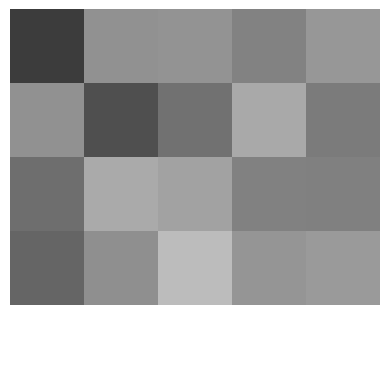

In [6]:
# Run the IGTD algorithm using (1) the Euclidean distance for calculating pairwise feature distances and pariwise pixel
# distances and (2) the absolute function for evaluating the difference between the feature distance ranking matrix and
# the pixel distance ranking matrix. Save the result in Test_1 folder.

fea_dist_method = 'Euclidean'
image_dist_method = 'Euclidean'
error = 'abs'
result_dir = 'D:\_workspace\IGTD_data\Results\Test_1'
os.makedirs(name=result_dir, exist_ok=True)
table_to_image(norm_data, [num_row, num_col], fea_dist_method, image_dist_method, save_image_size,
               max_step, val_step, result_dir, error)